<h1><center>IAGA Summer School 2019</center></h1>

#  Tracing magnetic field lines

The basic principle in following a field line at a point is to calculate the field vector there, then 'take a step' in the direction of the field to a new point, and repeat. The smaller the step, the higher the accuracy. This can be expressed as,

$$
\begin{align}
\delta \mathbf{r} &= k \mathbf{B}\\
&=\left(\delta r, \thinspace r \delta \theta, \thinspace r\sin{\theta}\delta \phi\right) = k\left(B_r, \thinspace B_\theta, \thinspace B_\phi\right)
\end{align}
$$

with k a constant to scale the step size. We will use this to investigate the path of field lines computed using the IGRF, but first explore the simpler case of axisymmetric fields, where an explicit formula can be derived, avoiding the need for the 'stepping strategy'.

## Axisymmetric multipole field lines

In this case there is no variation with longitude ($\phi$) and so, using spherical coordinates,

$$\delta \mathbf{r}=\left(\delta r, r \delta \theta\right) = k(B_r, B_\theta)$$

which gives the equation of the field line as,

$$\frac{1}{r}\frac{dr}{d_\theta}= \frac{B_r}{B_\theta}$$

This equation can be solved when the field is expressed in terms of spherical harmonics for the axisymmetric terms with $m=0$. In a spherical harmonic expansion, the zonal terms $P_n^o$ correspond to axial multipoles, ($P_1^0$ is a dipole, $P_2^0$ is a quadrupole, $P_3^0$ is an octupole and $P_4^0$ is an hexadecapole.) The field line equation for $P_n^0$ is (Willis and Young, 1987; Jeffreys, 1988),

$$r^n=\sin{\theta} \thinspace P_n^1(\cos{\theta})$$

Note the power of $n$, and that the Associated Legendre polynomial in the equation has $m=1$ not $m=0$. The (un-normalised) forms of $P_n^1$ for $n=1, \dots 4$ are as follows,

$$
\begin{align}
P_1^1&=\sin^2{\theta}\\
P_2^1&=\cos{\theta}\sin^2{\theta}\\
P_3^1&=(5\cos^2{\theta}-1)\sin^2{\theta}\\
P_4^1&=(7\cos^3{\theta}-3\cos{\theta})\sin^2{\theta}
\end{align}
$$


The functions below are used to compute values of these functions.

In [1]:
import numpy as np

def dipole(r0, th0, th):      # P(n=1, m=0)
    k = r0/(np.sin(th0)**2)
    return(k*np.sin(th)**2)
    
def quadpole(r0, th0, th):    # P(n=2, m=0)
    k = r0**2/(np.sin(th0)**2*np.cos(th0))
    t = np.cos(th)*np.sin(th)**2
    return(np.sqrt(np.abs(k)*np.abs(t)))

def octpole(r0, th0, th):     # P(n=3, m=0)
    k = r0**3/(np.sin(th0)**2*(5*np.cos(th0)**2-1))
    t = (5*np.cos(th)**2-1)*np.sin(th)**2
    return((np.abs(k)*np.abs(t))**(1/3))
    
def hexdpole(r0, th0, th):    # P(n=4, m=0)
    k = r0**4/((7*np.cos(th0)**3-3*np.cos(th0))*np.sin(th0)**2)
    t =(7*np.cos(th)**3-3*np.cos(th))*np.sin(th)**2
    return((np.abs(k)*np.abs(t))**(1/4))

You can plot dipole, quadrupole, octupole and hexadecapole field lines using the code below. Start by choosing the type of multipole field lines to plot by selecting the value of **ptype**, then some values of colatitude in the list **theta**. The program will draw the field lines passing through the point on the Earth's surface at each value of colatitude (represented as radius=1 so the axes are scalled in Earth radii). Different choices of colatitudes may be more illuminating in different cases.
### >> Set the input parameters

In [23]:
# Select the type of pole to plot: 2 for dipole; 4 for quadrupole; 8 for octupole; 16 for hexadecapole
ptype = 16

# Experiment by changing a list of starting colatitudes
theta   = [10, 15, 20, 30, 40]

Now create the plot.

Text(0.5, 1.0, 'Hexadecapole field lines')

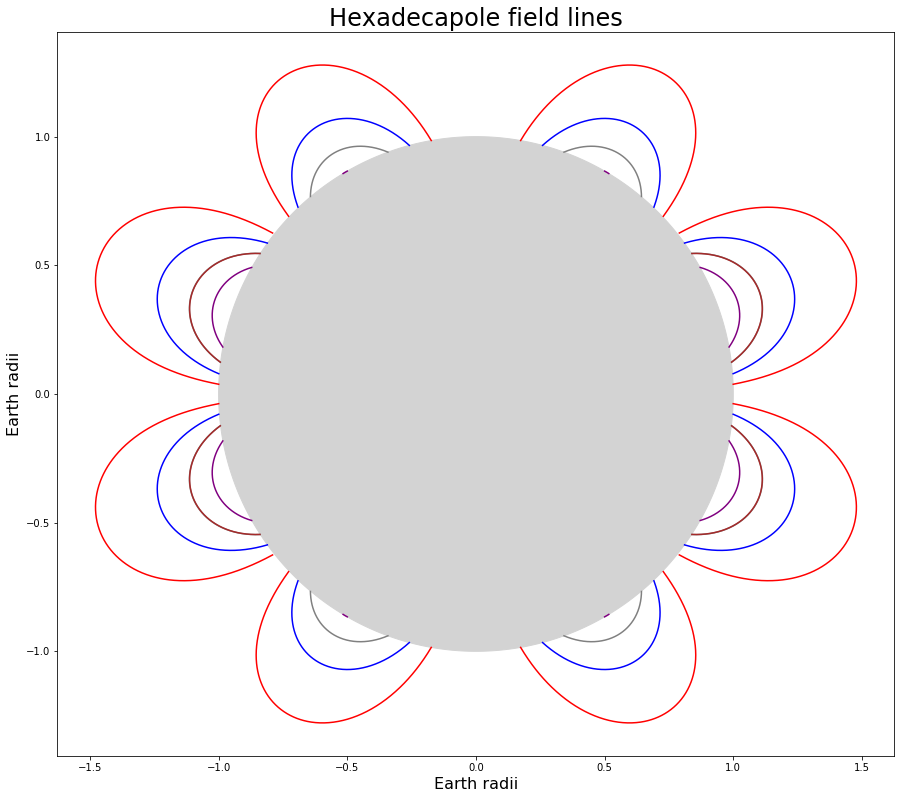

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
d2r     = np.deg2rad
axpoles = {2:dipole, 4:quadpole, 8:octpole, 16:hexdpole}
names   = {2:'Dipole', 4:'Quadrupole', 8:'Octupole', 16:'Hexadecapole'}
clines  = ['red', 'blue', 'grey', 'purple', 'brown', 'purple', 'pink', 'orange', 'magenta', 'olive', 'cyan']

# Define the "Earth"
r0  = 1
the = d2r(np.linspace(0,360,1000))
xe  = r0*np.sin(the)
ye  = r0*np.cos(the)

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.fill(xe, ye, color='lightgrey') # Plot the Earth

ic = -1
for i in theta:
    ic += 1
    th0 = d2r(i)
    th = np.linspace(th0, d2r(90), 1000)
    rad = axpoles[ptype](r0, th0, th)
    xb = rad*np.sin(th)
    yb = rad*np.cos(th)
    xb[np.where(rad<1)] = np.nan
    yb[np.where(rad<1)] = np.nan
    ax.plot(xb, yb, color = clines[ic%10])
    # Assume a symmetrical distribution in the four quadrants
    ax.plot( xb, -yb, color = clines[ic%10])
    ax.plot(-xb,  yb, color = clines[ic%10])
    ax.plot(-xb, -yb, color = clines[ic%10])
ax.set_xlabel('Earth radii', fontsize=16)
ax.set_ylabel('Earth radii', fontsize=16)
ax.set_title(names[ptype]+' field lines', fontsize=24)

### References

Jeffreys, B. (1988) ‘Derivations of the equation for the field lines of an axisymmetric multipole’, Geophysical Journal International. John Wiley & Sons, Ltd (10.1111), 92(2), pp. 355–356. doi: 10.1111/j.1365-246X.1988.tb01148.x.

Willis, D. M. and Young, L. R. (1987) ‘Equation for the field lines of an axisymmetric magnetic multipole’, Geophysical Journal International. Oxford University Press, 89(3), pp. 1011–1022. doi: 10.1111/j.1365-246X.1987.tb05206.x.

# Using the IGRF to trace field lines  (and find conjugate points)

The IGRF gives a fuller 3-D representation of the geomagnetic field and so the 'stepping strategy' is needed to follow field lines. The dipole field dominates, as we would expect, but it is interesting to to see how the colatitude and longitude change along the path. The starting and ending points at the Earth's surface are 'connected' by a field line - they are conjugate points. (The IGRF for 2015.0 is used in the code below.)
### >> Set the input parameters

In [26]:
# Set the starting colatitude and longitude (east) in degrees
th0   = 30
ph0   = 330

# Step size for the field line tracing in km
step_size = 10

Now do the calculation and plot the results. *** This may take a few seconds - be patient! ***

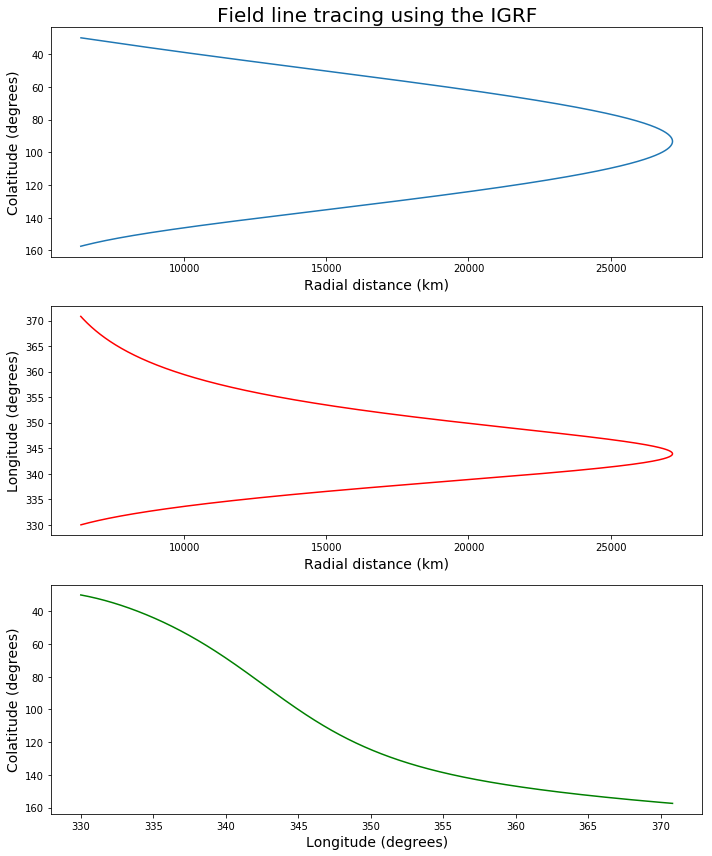

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('C:\\PP\\Science\\python\\IAGA_SummerSchool2019\\src')
import sha_lib as sha

d2r = np.deg2rad
r2d = np.rad2deg
fcalc = lambda x: np.sqrt(np.dot(x,x))

IGRF12 = 'C:\\PP\\Science\\python\\data\\igrf12coeffs.txt'
igrf12 = pd.read_csv(IGRF12, delim_whitespace=True, header=3)
gh2015 = np.append(0., igrf12['2015.0'])
NMAX   = 13

# Initialise variables at starting point
r0      = 6371.2
thrd    = d2r(th0)
phrd    = d2r(ph0)
track   = [(r0, thrd, phrd)]  # Store coordinates of points on the field line
bxyz    = sha.shm_calculator(gh2015, NMAX, r0, th0, ph0, 'Geocentric')
eff     = fcalc(bxyz)
lamb    = step_size/eff
rad     = r0

# Allow a maximum number of steps in the iteration for the field line to
# return to the Earth's surface
maxstep = 10000
newrad  = r0+0.001

step    = 0
while step <= maxstep and newrad >= r0:
    rad, th, ph  =  track[step]
    lx,  ly, lz  =  tuple(el*lamb for el in bxyz)
    newrad = rad+lz
    newth  = th+lx/rad
    newph  = ph-ly/(rad*np.sin(th))
    track += [(newrad, newth, newph)]
    bxyz   =  sha.shm_calculator(gh2015, NMAX, newrad, r2d(newth), \
                                 r2d(newph),'Geocentric')
    lamb   =  step_size/fcalc(bxyz)
    step  += 1

rads = np.array([r[0] for r in track])
ths  = np.array([t[1] for t in track])
phs  = np.array([p[2] for p in track])

fig, (ax0, ax1, ax2) = plt.subplots(3,1)
plt.rcParams['figure.figsize'] = [10, 12]
ax0.plot(rads,r2d(ths))
ax0.set_ylim(ax0.get_ylim()[::-1])
ax0.set_xlabel('Radial distance (km)', fontsize=14)
ax0.set_ylabel('Colatitude (degrees)', fontsize=14)
ax0.set_title('Field line tracing using the IGRF', fontsize=20)
ax1.plot(rads,r2d(phs), color='red')
ax1.set_xlabel('Radial distance (km)', fontsize=14)
ax1.set_ylabel('Longitude (degrees)', fontsize=14)
ax2.plot(r2d(phs), r2d(ths), color='green')
ax2.set_xlabel('Longitude (degrees)', fontsize=14)
ax2.set_ylabel('Colatitude (degrees)', fontsize=14)
ax2.set_ylim(ax2.get_ylim()[::-1])
plt.tight_layout()

In [30]:
print('\nCoordinates of the starting point:')
print('\tColatitude :', '{0:.1f}'.format(th0), 'degrees')
print('\tLongitude  :', '{0:.1f}'.format(ph0), 'degrees')
print('\nCoordinates of the conjugate point:')
print('\tColatitude :', '{0:.1f}'.format(r2d(newth)), 'degrees')
print('\tLongitude  :', '{0:.1f}'.format(r2d(newph)%360), 'degrees')


Coordinates of the starting point:
	Colatitude : 30.0 degrees
	Longitude  : 330.0 degrees

Coordinates of the conjugate point:
	Colatitude : 157.4 degrees
	Longitude  : 10.8 degrees
